In [2]:
#loading the dataset from keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt
 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

170500096/170498071 [==============================] - 11394s 67us/step


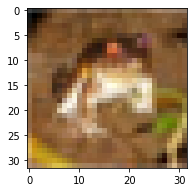

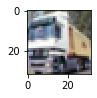

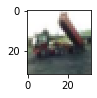

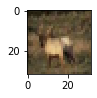

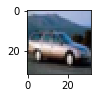

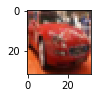

In [3]:
#Plotting some images from the dataset to visualize the dataset
n=6
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(330+1+i)
    plt.imshow(train_X[i])
    plt.show()

In [4]:
#Import the layers and modules to create a convolutional neural network architecture.
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [5]:
#Normalize the dataset to float type.
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

In [6]:
#Performing one hot encoding for the target classes.
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

In [7]:
#Sequential models and adding layers.
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
#optimizing and compling the model.
sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
 
model.compile(loss='categorical_crossentropy',
  optimizer=sgd,
  metrics=['accuracy'])

In [10]:
#Summarizing the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [11]:
#Train the model and the mimcs of human brain in the sense of epoch parameters.
model.fit(train_X,train_Y,
    validation_data=(test_X,test_Y),
    epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 385s 246ms/step - loss: 1.7163 - accuracy: 0.3773 - val_loss: 1.3671 - val_accuracy: 0.5037
Epoch 2/10
1563/1563 [==============================] - 386s 247ms/step - loss: 1.3511 - accuracy: 0.5137 - val_loss: 1.2279 - val_accuracy: 0.5603
Epoch 3/10
1563/1563 [==============================] - 311s 199ms/step - loss: 1.1825 - accuracy: 0.5796 - val_loss: 1.1227 - val_accuracy: 0.6011
Epoch 4/10
1563/1563 [==============================] - 309s 198ms/step - loss: 1.0568 - accuracy: 0.6241 - val_loss: 1.0279 - val_accuracy: 0.6338
Epoch 5/10
1563/1563 [==============================] - 313s 200ms/step - loss: 0.9573 - accuracy: 0.6600 - val_loss: 0.9754 - val_accuracy: 0.6537
Epoch 6/10
1563/1563 [==============================] - 327s 209ms/step - loss: 0.8686 - accuracy: 0.6919 - val_loss: 0.9589 - val_accuracy: 0.6621
Epoch 7/10
1563/1563 [==============================] - 350s 224ms/step - loss: 0.7976 - accuracy: 0.7180 - val_

In [12]:
#Accuracy
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

313/313 [==============================] - 8s 27ms/step - loss: 0.9018 - accuracy: 0.6920
69.19999718666077


In [13]:
#Saving the model
model.save("model1_cifar_10epoch.h5")

In [19]:
#Making a dictionary to map to the output classes and make predictions from the model
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}
from PIL import Image
import numpy as np
im=Image.open("C:\\Users\\sushil.kasar\\Downloads\\Input_img.jpg")
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

0 aeroplane


In [ ]:
#The above image contains an aeroplane located in the given path.

In [ ]:
#we can use gui T'kinter for reviewing the output and its classification.